## API Pull and Analysis

In [5]:
import requests
import json
response_API = requests.get('https://www.reed.co.uk/api/1.0/search?graduate=true')

In [33]:
data = response_API.text

In [34]:
pip install reed

Note: you may need to restart the kernel to use updated packages.


In [11]:
from reed import ReedClient

client = ReedClient(api_key= '7269a1b6-da90-4144-9cec-c1c8b93326a0')

In [35]:
params = {
    'graduate' : "true" "false",
    'minimumSalary': 1
}

In [54]:
response = client.search(**params)

In [55]:
print(response)

[{'jobId': 48696813, 'employerId': 451880, 'employerName': 'Corriculo Ltd', 'employerProfileId': None, 'employerProfileName': None, 'jobTitle': 'Data Scientist, Forecasting Analyst, Python, R, Finance, Remote, 4658', 'locationName': 'London', 'minimumSalary': 50000.0, 'maximumSalary': 60000.0, 'currency': 'GBP', 'expirationDate': '12/12/2022', 'date': '31/10/2022', 'jobDescription': ' Data Scientist, Forecasting&nbsp;Analyst, Python, R, Finance, RemoteAn exciting opportunity has arisen for a skilled Data Scientist&nbsp;/ Forecasting Analyst&nbsp;to join a thriving and rapidly growing software house within the games industry. This Data Scientist&nbsp;/ Forecasting Analyst position is operating on a fully remote basis with  opportunities to work in various locations globally, with office space i... ', 'applications': 24, 'jobUrl': 'https://www.reed.co.uk/jobs/data-scientist-forecasting-analyst-python-r-finance-remote-4658/48696813'}, {'jobId': 48648132, 'employerId': 589273, 'employerNam

In [10]:
df = pd.DataFrame(response)

In [12]:
df.head()

,jobId,employerId,employerName,employerProfileId,employerProfileName,jobTitle,locationName,minimumSalary,maximumSalary,currency,expirationDate,date,jobDescription,applications,jobUrl
0,48809236,331522,Harnham,None,None,Sanctions Screening Client Sales Lead,London,100000.0,130000.0,GBP,19/12/2022,07/11/2022,Sanctions Screening Client Sales Lead London ...,3,https://www.reed.co.uk/jobs/sanctions-screenin...
1,48928712,653512,LHH Recruitment Solutions,None,None,Marketing Director,London,110000.0,120000.0,GBP,27/12/2022,15/11/2022,I am representing the largest global mobile v...,25,https://www.reed.co.uk/jobs/marketing-director...
2,48809156,578236,Hansen Filler,None,None,Interim HR Process Lead,London,450.0,550.0,GBP,19/12/2022,07/11/2022,We are currently working alongside a leading ...,35,https://www.reed.co.uk/jobs/interim-hr-process...
3,48928625,391063,Opus Recruitment Solutions Ltd,None,None,Senior Account Executive,London,100000.0,150000.0,GBP,27/12/2022,15/11/2022,Senior Sales Executive/ Location: London / UK ...,3,https://www.reed.co.uk/jobs/senior-account-exe...
4,48809060,331522,Harnham,None,None,Sales Consultant,London,90000.0,130000.0,GBP,19/12/2022,07/11/2022,"SALES CONSULTANT &#163;90,000 - &#163;130,000...",7,https://www.reed.co.uk/jobs/sales-consultant/4...


In [13]:
len(df.index)

100

#### Transformation 1
The first step is to drop all of the unecessary columns from this df. In order to join to the other two datasets, I think it would be most helpful to just aggregate the API table in order to give context to # of jobs available in the market. If I leave unique rows, there is no true connection to the flat file.

In [14]:
df = df.drop(['jobId', 'employerId', 'employerName', 'employerProfileId', 'employerProfileName', 'expirationDate', 'date', 'jobDescription', 'jobUrl'] , axis=1)

In [15]:
df.head()

,jobTitle,locationName,minimumSalary,maximumSalary,currency,applications
0,Sanctions Screening Client Sales Lead,London,100000.0,130000.0,GBP,3
1,Marketing Director,London,110000.0,120000.0,GBP,25
2,Interim HR Process Lead,London,450.0,550.0,GBP,35
3,Senior Account Executive,London,100000.0,150000.0,GBP,3
4,Sales Consultant,London,90000.0,130000.0,GBP,7


In [16]:
print(df['locationName'].unique())

['London' 'Southport' 'Leeds' 'Birmingham' 'Oxford' 'Barnet' 'Cambridge'
 'Blyth' 'City of London' 'Dublin' 'Manchester' 'Parrett Works' 'Cheshire'
 'Penn' 'Bournemouth' 'Milan' 'Glasgow' 'Basingstoke' 'Wrexham' 'Camden'
 'United Kingdom' 'Nursling' 'Reading' 'Derby' 'Cardiff' 'Dubai' 'Croydon'
 'Chelmsford' 'Fulham' 'Malvern' 'USA' 'Bristol' 'West Midlands (Region)'
 'Sheffield' 'Peterborough' 'Swanley' 'South East England' 'Vienna'
 'Ascot' 'Milton Keynes']


In [19]:
df = df.drop('locationName', axis=1)

#### Transformation 2
Second transformation is to drop any results with no salary or currency information. 

In [17]:
print(df['currency'].unique())

['GBP' None 'EUR' 'USD']


In [20]:
df = df[df.currency.notnull()]

In [21]:
df = df[df.maximumSalary.notnull()]

#### Transformation 3
Third transformation is to check for any outliers in the salary.

In [84]:
import numpy as np

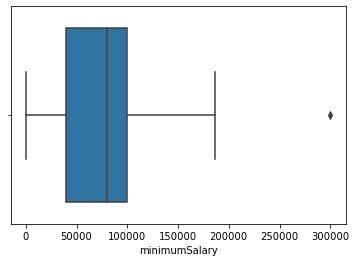

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x = df['minimumSalary'])
plt.show()

In [24]:
df['minimumSalary'].describe()

count        75.000000
mean      72961.846667
std       52761.942584
min          38.500000
25%       40000.000000
50%       80000.000000
75%      100000.000000
max      300000.000000
Name: minimumSalary, dtype: float64

In [27]:
df['minimumSalary'].quantile(0.25)

40000.0

In [28]:
df['minimumSalary'].quantile(0.75)

100000.0

In [44]:
Q1 = df['minimumSalary'].quantile(0.25)
Q3 = df['minimumSalary'].quantile(0.75)
IQR = Q3 - Q1

In [45]:
IQR

60000.0

In [32]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [33]:
lower_lim

-50000.0

In [34]:
upper_lim

190000.0

In [49]:
outliers_15_low = (df['minimumSalary'] < lower_lim)

In [50]:
outliers_15_up = (df['minimumSalary'] > upper_lim)

In [51]:
len(df['minimumSalary']) - len(df['minimumSalary'][outliers_15_low] + len(df['minimumSalary'][outliers_15_up]))

75

In [52]:
df['minimumSalary'][(outliers_15_low | outliers_15_up)]

23    300000.0
Name: minimumSalary, dtype: float64

In [53]:
df['minimumSalary'][-(outliers_15_low | outliers_15_up)]

0     100000.0
1     110000.0
2        450.0
3     100000.0
4      90000.0
        ...   
91     80000.0
92    100000.0
93     80000.0
94     51000.0
98       300.0
Name: minimumSalary, Length: 74, dtype: float64

In [54]:
df = df[-(outliers_15_low | outliers_15_up)]

In [55]:
df

,jobTitle,minimumSalary,maximumSalary,currency,applications
0,Sanctions Screening Client Sales Lead,100000.0,130000.0,GBP,3
1,Marketing Director,110000.0,120000.0,GBP,25
2,Interim HR Process Lead,450.0,550.0,GBP,35
3,Senior Account Executive,100000.0,150000.0,GBP,3
4,Sales Consultant,90000.0,130000.0,GBP,7
...,...,...,...,...,...
91,Sales & Marketing Director,80000.0,100000.0,GBP,21
92,Head of Consumer Insights & Strategic Marketing,100000.0,100000.0,GBP,17
93,Chief Marketing Officer,80000.0,110000.0,GBP,2
94,Regional Sales Director - Ascot,51000.0,120000.0,GBP,0


### Transformation 4
Validate that there are no duplicate jobs postings pulled from the API. 

In [58]:
boolean = not df["jobTitle"].is_unique     
boolean

True

In [60]:
boolean = df['jobTitle'].duplicated().any() 
boolean

True

#### Transformation 5
The final step is to categorize the jobs by department and aggregate the data so that we can provide insights to the existing employee data. 

In [18]:
print(df['jobTitle'].unique())

['Sanctions Screening Client Sales Lead' 'Marketing Director'
 'Interim HR Process Lead ' 'Senior Account Executive' 'Sales Consultant'
 'National Sales Manager / Sales Director - LegalTech/PropertyTech'
 'Marketing Campaign Manager - SC Cleared - Contract' 'Sales Executive '
 'Specification Sales Manager - Wall Partition Systems'
 'Sales Closer - Financial Services' 'Interim Senior HR Business Partner'
 'Cloud Pre-sales Architect' 'Marketing & Brand Consultant'
 'Sales Apprentice' 'Digital Marketing Coordinator'
 'Head of Sales Operations' 'Senior Medical Writer pharmacovigilance'
 'UK Sales Manager Intralogistics' 'Cloud Security Sales Specialist'
 'Head of Sales - Middle East' 'B2B Sales Manager'
 'Sales / Business Development - DLT / Blockchain, ESG, Sustainable Finance - EMEA - Remote'
 'Client Biller Marketing Agency' 'HR Officer'
 'Solution Architect - HR Systems' 'Sales Manager' 'Institutional Sales'
 'Sales Director'
 'Enterprise Sales\xa0- Cloud, Digital Transformation, UC & 

In [64]:
## Create input dataframe using copy to clipboard

department = ['Sales', 'Sales', 'Human Resources', 'Sales', 'Sales', 'Sales', 'Sales', 'Sales', 'Sales', 'Sales', 'Sales', 'Human Resources', 'Sales', 'Sales', 'Sales', 'Sales', 'Sales', 'Sales', 'Human Resources', 'Sales', 'Sales', 'Sales', 'Sales', 'Healthcare', 'Sales', 'Sales', 'Sales', 'Sales', 'Sales', 'Sales', 'Sales', 'Human Resources', 'Sales', 'Sales', 'Human Resources', 'Healthcare', 'Sales', 'Sales', 'Sales', 'Sales', 'Sales', 'Healthcare', 'Sales', 'Sales', 'Sales', 'Sales', 'Sales', 'Human Resources', 'Other', 'Acounting and Finance', 'Acounting and Finance', 'Sales', 'Acounting and Finance', 'Sales', 'Sales', 'Sales', 'Sales', 'Sales', 'Sales', 'Sales', 'Sales', 'Sales', 'Sales', 'Sales', 'Human Resources', 'Human Resources', 'Healthcare', 'Human Resources', 'Healthcare', 'Sales', 'Sales', 'Sales', 'Sales', 'Human Resources']

In [65]:
df['Department'] = department

In [66]:
df

,jobTitle,minimumSalary,maximumSalary,currency,applications,Department
0,Sanctions Screening Client Sales Lead,100000.0,130000.0,GBP,3,Sales
1,Marketing Director,110000.0,120000.0,GBP,25,Sales
2,Interim HR Process Lead,450.0,550.0,GBP,35,Human Resources
3,Senior Account Executive,100000.0,150000.0,GBP,3,Sales
4,Sales Consultant,90000.0,130000.0,GBP,7,Sales
...,...,...,...,...,...,...
91,Sales & Marketing Director,80000.0,100000.0,GBP,21,Sales
92,Head of Consumer Insights & Strategic Marketing,100000.0,100000.0,GBP,17,Sales
93,Chief Marketing Officer,80000.0,110000.0,GBP,2,Sales
94,Regional Sales Director - Ascot,51000.0,120000.0,GBP,0,Sales


In [81]:
df['Department'].value_counts()

Sales                    55
Human Resources          10
Healthcare                5
Acounting and Finance     3
Other                     1
Name: Department, dtype: int64

In [85]:
df.pivot_table(index='Department', values='applications', aggfunc=np.sum)

,applications
Department,
Acounting and Finance,18
Healthcare,5
Human Resources,185
Other,4
Sales,1794


In [86]:
df.pivot_table(index='Department', values='minimumSalary', aggfunc=np.average)

,minimumSalary
Department,
Acounting and Finance,34333.333333
Healthcare,53907.700000
Human Resources,38260.000000
Other,100000.000000
Sales,78490.909091


In [87]:
df.pivot_table(index='Department', values='maximumSalary', aggfunc=np.average)

,maximumSalary
Department,
Acounting and Finance,145000.000000
Healthcare,62125.400000
Human Resources,47307.700000
Other,120000.000000
Sales,118537.454545


In [88]:
Data = {'Department': ['Sales', 'Human Resources', 'Healthcare', 'Accounting and Finance', 'Other'],
        'Job_Listings': [55, 10, 5, 3, 1],
        'Applications': [1794, 185, 5, 15, 4],
        'Average_minimumSalary': [78490, 38260, 53907, 34333, 100000], 
        'Average_maximumSalary': [118537, 47307, 62125, 145000, 120000]}

df_final = pd.DataFrame(Data)

df_final


,Department,Job_Listings,Applications,Average_minimumSalary,Average_maximumSalary
0,Sales,55,1794,78490,118537
1,Human Resources,10,185,38260,47307
2,Healthcare,5,5,53907,62125
3,Accounting and Finance,3,15,34333,145000
4,Other,1,4,100000,120000


### Implications and Considerations
This final table has a significantly smaller sample size than the original flat file. Sales had the most job listings and applications submitted, which makes it the most reliable department out of the sample. However, for real-world application, a longer processing time and pull from the API would be required to get the most comprehensive averages and look at the current job market available. Ideally, this would also be pulled from an American job postings board (or wherever the source data originates). Since the data in the project is fabricated, no additional social considerations can be made of the sample population. In a real-world scenario, engagement with key HR business partners, Legal, and Privacy would be required in order to facilitate conversations regarding employee data and talent acquisition and retention. 

In [89]:
df_final.to_excel("milestone_4.xlsx") 